<a href="https://colab.research.google.com/github/tejaswini309/Codsoft-Data-Science-internship-Tasks-/blob/main/Task_05_ipynb(CREDIT_CARD_FRAUD_DETECTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Author:Tejaswini Avula
Batch: November
Domain: Data Science
Aim:CREDIT CARD FRAUD DETECTION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import subprocess
import sys

In [ ]:

try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    import os
    os.system('pip install imbalanced-learn')
    from imblearn.over_sampling import SMOTE


In [ ]:
data_path = r"C:\Users\tejaswini avula\Downloads\archive (6)\creditcard.csv"  # Replace with your actual file path
data = pd.read_csv(data_path)

In [ ]:
#View the structure and first few rows of the dataset
print("Dataset Overview:")
print(data.head())

print("\nDataset Structure:")
print(data.info())



Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

In [ ]:
# View the last 5 rows of the dataset
print("\nLast 5 Rows of the Dataset:")
print(data.tail())


Last 5 Rows of the Dataset:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1

In [ ]:
#Exploratory Data Analysis (EDA)
print("\nDataset Description (Rounded to 2 Decimal Places):")
print(data.describe().round(2))



Dataset Description (Rounded to 2 Decimal Places):
            Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86       0.00       0.00      -0.00       0.00       0.00   
std     47488.15       1.96       1.65       1.52       1.42       1.38   
min         0.00     -56.41     -72.72     -48.33      -5.68    -113.74   
25%     54201.50      -0.92      -0.60      -0.89      -0.85      -0.69   
50%     84692.00       0.02       0.07       0.18      -0.02      -0.05   
75%    139320.50       1.32       0.80       1.03       0.74       0.61   
max    172792.00       2.45      22.06       9.38      16.88      34.80   

              V6         V7         V8         V9  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00      -0.00       0.00      -0.00  ...       0.00      -0.00   
std         1.33       1.24     

In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Check for duplicated values
print("\nNumber of Duplicated Rows:")
print(data.duplicated().sum())



Number of Duplicated Rows:
1081


In [ ]:
# Drop duplicated values
print("\nDropping Duplicated Rows...")
data = data.drop_duplicates()
print("Number of Rows After Dropping Duplicates:", len(data))


Dropping Duplicated Rows...
Number of Rows After Dropping Duplicates: 283726


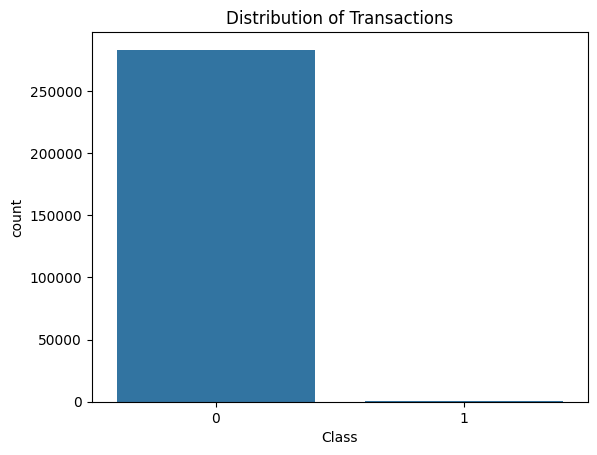

In [ ]:
#Visualizations
# Distribution of transactions
sns.countplot(x='Class', data=data)
plt.title('Distribution of Transactions')
plt.show()

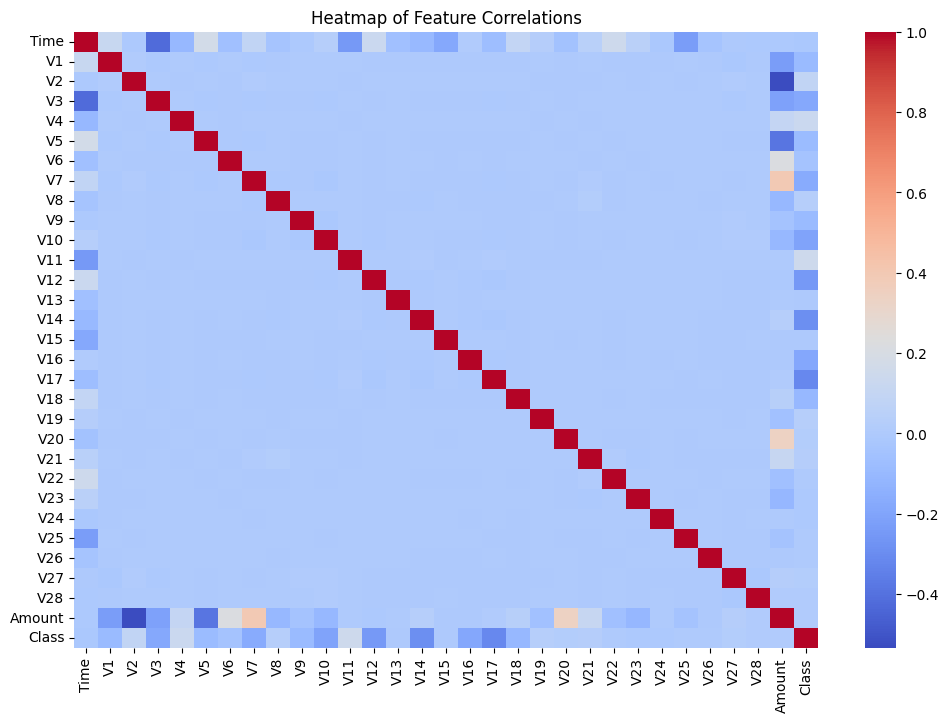

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [ ]:
#Define a transaction separation function
def transaction_analysis(data):
    legit = data[data['Class'] == 0]
    fraud = data[data['Class'] == 1]

    print("\nLegit Transactions Info:")
    print(legit.info())

    print("\nFraud Transactions Info:")
    print(fraud.info())

    print("\nLegit Transactions Description:")
    print(legit.describe().round(2))

    print("\nFraud Transactions Description:")
    print(fraud.describe().round(2))

    print("\nNumber of Legit Transactions:", len(legit))
    print("Number of Fraudulent Transactions:", len(fraud))

    return legit, fraud



In [ ]:
# Example usage
legit, fraud = transaction_analysis(data)


Legit Transactions Info:
<class 'pandas.core.frame.DataFrame'>
Index: 283253 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283253 non-null  float64
 1   V1      283253 non-null  float64
 2   V2      283253 non-null  float64
 3   V3      283253 non-null  float64
 4   V4      283253 non-null  float64
 5   V5      283253 non-null  float64
 6   V6      283253 non-null  float64
 7   V7      283253 non-null  float64
 8   V8      283253 non-null  float64
 9   V9      283253 non-null  float64
 10  V10     283253 non-null  float64
 11  V11     283253 non-null  float64
 12  V12     283253 non-null  float64
 13  V13     283253 non-null  float64
 14  V14     283253 non-null  float64
 15  V15     283253 non-null  float64
 16  V16     283253 non-null  float64
 17  V17     283253 non-null  float64
 18  V18     283253 non-null  float64
 19  V19     283253 non-null  float64
 20  V20     283253 non-null  fl


Combined Legit and Fraud Dataset Overview:
            Time        V1        V2        V3        V4        V5        V6  \
89847    62750.0  1.211857  0.214647  0.251622  0.655917 -0.296912 -0.632716   
58449    48393.0 -0.273438  0.490300  1.010000 -0.945002 -0.211382 -0.430799   
215510  140104.0 -0.350369  1.009432 -2.156453 -1.346902  3.193492  3.112331   
214563  139723.0 -3.476136  3.490268 -3.115547 -2.491024  2.438255  3.056458   
211506  138443.0  1.966261 -0.514129 -0.375700  0.269716 -0.537475  0.082308   

              V7        V8        V9  ...       V21       V22       V23  \
89847  -0.075810  0.005932  0.218520  ... -0.274280 -0.818288  0.173728   
58449   0.669947 -0.157260 -2.002431  ... -0.663636 -1.577487  0.091195   
215510  0.314518  0.697301  0.141088  ...  0.317179  0.857644 -0.137576   
214563  0.494154  0.773470  3.148542  ... -0.203782  0.923961  0.051908   
211506 -0.767533  0.134622  1.016059  ...  0.189962  0.749768  0.095811   

             V24       V

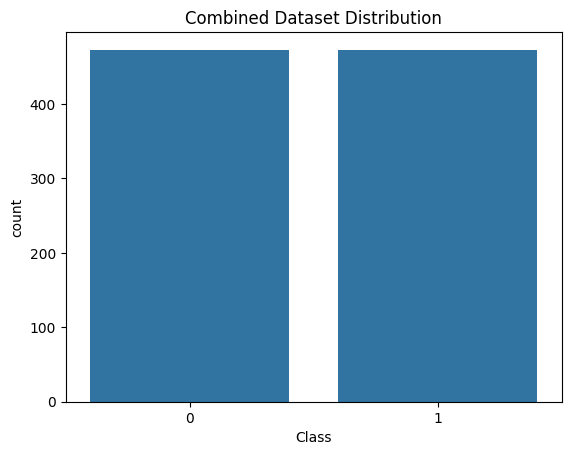

In [ ]:
# Combine a subset of legit and fraud data for balanced analysis
legit_sample = legit.sample(n=len(fraud))
combined_data = pd.concat([legit_sample, fraud])

print("\nCombined Legit and Fraud Dataset Overview:")
print(combined_data.head())

sns.countplot(x='Class', data=combined_data)
plt.title('Combined Dataset Distribution')
plt.show()


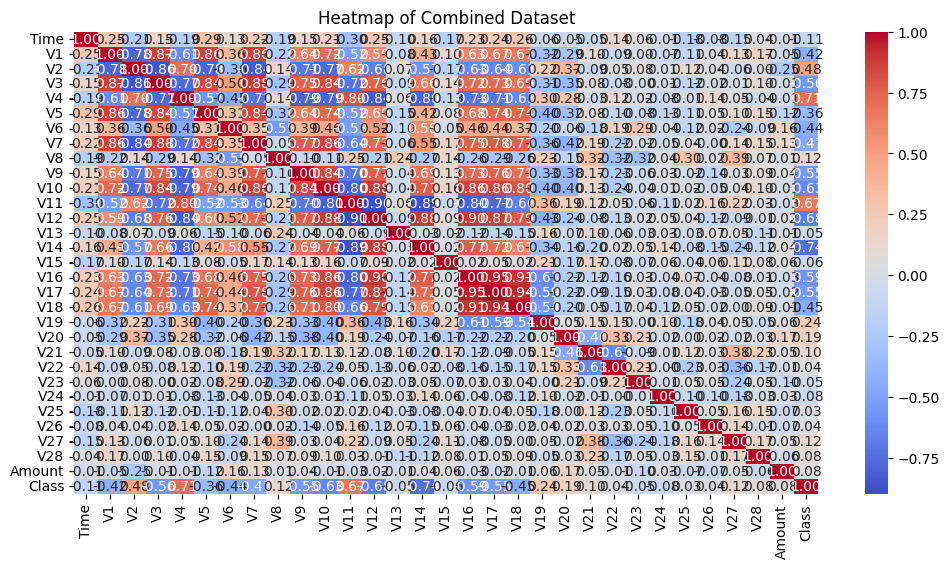

In [ ]:
#Visualize combined data
plt.figure(figsize=(12, 6))
sns.heatmap(combined_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Combined Dataset')
plt.show()


In [ ]:
# Prepare Data for Training
X = combined_data.drop(columns=['Class'])
y = combined_data['Class']


In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Train Models (Logistic Regression and Random Forest)
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nLogistic Regression Evaluation:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Classifier Evaluation:")
evaluate_model(rf_model, X_test, y_test)



Logistic Regression Evaluation:
Confusion Matrix:
[[85  3]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.97      0.91      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Accuracy: 0.9368421052631579

Random Forest Classifier Evaluation:
Confusion Matrix:
[[86  2]
 [ 8 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.98      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

Accuracy: 0.9473684210526315
